In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorboard import notebook
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sys
import scipy.io
import numpy
import cv2
# pd.options.display.max_columns = None
# numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
SVHN_train = scipy.io.loadmat(r'C:\Users\Callum\Desktop\cab420\CAB420Assignment1A\q3_train.mat')
SVHN_test = scipy.io.loadmat(r'C:\Users\Callum\Desktop\cab420\CAB420Assignment1A\q3_test.mat')

(10000, 1)
(1000, 32, 32, 3)


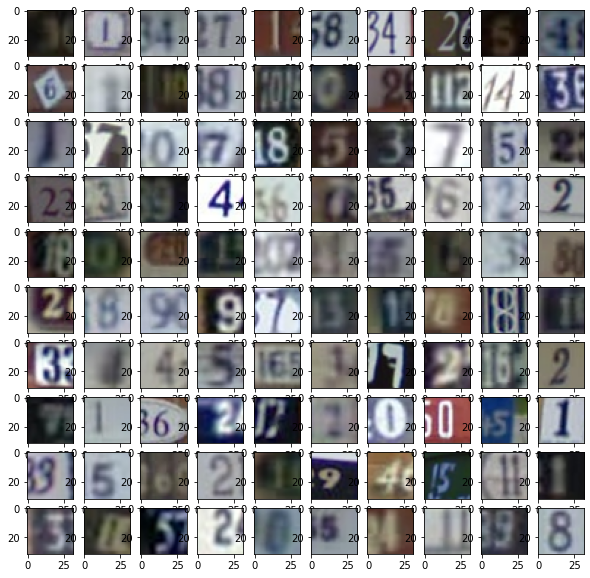

In [10]:


for i in range (len(SVHN_train['train_Y'])):
    SVHN_train['train_Y'][i] = SVHN_train['train_Y'][i] - 1
for i in range (len(SVHN_test['test_Y'])):
    SVHN_test['test_Y'][i] = SVHN_test['test_Y'][i] - 1
    
train_y = SVHN_train['train_Y']

test_y = SVHN_test['test_Y']    

# Do we need to preserve rbg value(3) in a 4D, or just put 1 in the end
train = numpy.transpose(SVHN_train['train_X'], (3, 0, 1, 2)).reshape(-1, 32, 32, 3)
test = numpy.transpose(SVHN_test['test_X'], (3, 0, 1, 2)).reshape(-1, 32, 32, 3)





print(SVHN_test['test_Y'].shape) 
print(train.shape)
fig = plt.figure(figsize=[10, 10])
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(train[i,:,:,:])


(1000, 28, 28, 1)
(10000, 28, 28, 1)


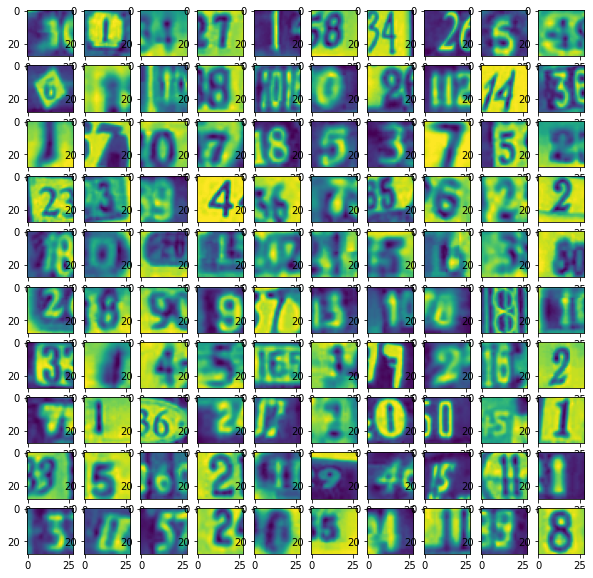

In [4]:
def scale(data):
    train_trim = numpy.array(data)


    for i,elem1 in enumerate(train_trim[:2]):
        for x,elem2 in enumerate(elem1[:2]):
            for y,elem3 in enumerate(elem2[:2]):    
                average = round(numpy.sum(elem3)/3)
                train_trim[i,x,y] = [average]

    train_trim = train_trim[:,:,:,2:]

    resized_ar = []
    for i,elem in enumerate(train_trim):
        width = 28
        height = 28
        dim = (width, height)
        resized = cv2.resize(elem, dim, interpolation = cv2.INTER_AREA)
        resized = resized.reshape(28,28,1)
        resized_ar.append(resized)
    resized_ar = numpy.array(resized_ar)  
    return resized_ar


  

resized_ar_train = scale(train)  
resized_ar_test = scale(test)    

print(resized_ar_train.shape) 
print(resized_ar_test.shape)


    
fig = plt.figure(figsize=[10, 10])
reresized_ar_train = resized_ar_train.reshape(1000,28,28)
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)   
    ax.imshow(reresized_ar_train[i,:,:])    
    




In [5]:
model = keras.models.load_model(r'C:\Users\Callum\Desktop\cab420\CAB420Assignment1A\vgg_2stage_MNIST_bigger.h5')
model.summary()

Model: "simple_vgg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
spatial_dropout2d_12 (Spatia (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0

In [6]:
for layer in model.layers[:-15]:
    layer.trainable = False

for layer in model.layers:
    print(layer, layer.trainable)





<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001619AD91348> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001619AD91E48> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001619ABC8188> False
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x000001619AD155C8> False
<tensorflow.python.keras.layers.core.Activation object at 0x000001619ACC7E88> False
<tensorflow.python.keras.layers.core.SpatialDropout2D object at 0x000001619ACB9708> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001619ADE49C8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001619ACF1E08> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001619AC94DC8> True
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x000001619AD51D48> True
<tensorflow.python.keras.layers.core.Activation object at 0x000001619AC14CC8> True
<tensorf

In [7]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
print(test_y.shape)
history = model.fit(resized_ar_train, train_y,
                        batch_size=128,
                        epochs=25,
                        validation_data=(resized_ar_test, test_y))


(10000, 1)
Train on 1000 samples, validate on 10000 samples
Epoch 1/25
1000/1000 [==============================] - 7s 7ms/sample - loss: 6.8432 - accuracy: 0.1150 - val_loss: 1679.2538 - val_accuracy: 0.1031
Epoch 2/25
1000/1000 [==============================] - 6s 6ms/sample - loss: 3.6277 - accuracy: 0.1790 - val_loss: 1611.2046 - val_accuracy: 0.1531
Epoch 3/25
1000/1000 [==============================] - 5s 5ms/sample - loss: 2.9397 - accuracy: 0.2060 - val_loss: 1455.0092 - val_accuracy: 0.1823
Epoch 4/25
1000/1000 [==============================] - 6s 6ms/sample - loss: 2.5685 - accuracy: 0.2390 - val_loss: 1108.5120 - val_accuracy: 0.2116
Epoch 5/25
1000/1000 [==============================] - 5s 5ms/sample - loss: 2.4437 - accuracy: 0.2980 - val_loss: 838.6870 - val_accuracy: 0.1835
Epoch 6/25
1000/1000 [==============================] - 5s 5ms/sample - loss: 2.1306 - accuracy: 0.3360 - val_loss: 587.5065 - val_accuracy: 0.1887
Epoch 7/25
1000/1000 [==========================

In [8]:
def eval_model(model, x_test, y_test):
    test_scores = model.evaluate(x_test, y_test, verbose=2)
    print('Test loss:', test_scores[0])
    print('Test accuracy:', test_scores[1])

    pred = model.predict(x_test);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(y_test, axis=1)

    cm = confusion_matrix(gt_idx, indexes)
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=range(49))
    c.plot(ax = ax)

    fig = plt.figure(figsize=[20, 5])
    ax = fig.add_subplot(1, 1, 1)
    ax.hist(gt_idx, bins=len(numpy.diagonal(cm)), rwidth=0.95)
    ax.plot(numpy.diagonal(cm))

In [9]:
eval_model(new_model, test, test_y)

NameError: name 'new_model' is not defined